In [1]:
import nstrace as ns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_max_time(events):
    times = []
    for e in events:
        times.append(e[1])
    return max(times)

In [41]:
def split_data(data):
    data_out = []
    for line in data:
        data_out.append(line.split())
    return data_out

def preprocess_file(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
        splitted_data = split_data(data)
        data = np.array(splitted_data, dtype=np.float64)
        data = np.trunc(data*10)/10
        return data

# data = preprocess_file('out.tr')
# print(data)
# print(data.shape)

def preprocess_drops(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        data = []
        for line in lines:
            if line.startswith('d'):
                data.append(line)
        data = split_data(data)
        data_tmp = []
        for row in data:
            data_tmp.append(row[1])
        data = np.array(data_tmp, dtype=np.float64)
        return data

# drops = preprocess_drops('out.tr_auto')
# print(drops)
# print(drops.shape)
        
def merge_data_drops(data, drops):
    drops_mat = np.zeros(data.shape[0])
    di = 0
    for drop in drops:
        while di < data.shape[0]-1 and not (data[di][0] <= drop < data[di+1][0]):
            di += 1
        drops_mat[di] += 1
    data = np.concatenate((data, np.expand_dims(drops_mat, axis=1)), axis=1)
    return data

# fin = merge_data_drops(data, drops)
# print(fin)
# print(fin.shape)

def preprocess(i, j):
    ist = str(i)
    jst = str(j)
    if len(jst) < 2:
        jst = '0'+jst
    filename = 'out/out'+ist+jst+'.tr'
    print('filename ', filename)
    data = preprocess_file(filename)
    drops = preprocess_drops(filename+'_auto')
    final = merge_data_drops(data, drops)
    return final

def mean_data(datas):
    data_sum = np.zeros(datas[0].shape)
    for data in datas:
        data_sum += data
    return data_sum/len(datas)

def main_process():
    datas = [[], [], []]
    for i in range(1, 4):
        for j in range(1, 11):
            datas[i-1].append(preprocess(i, j))
    return mean_data(datas[0]), mean_data(datas[1]), mean_data(datas[2])

a, b, c = main_process()
print(a)
print(b)
print(c)
# ns.nsopen('test.tr')

# traces = []
# with open('test.tr', 'r') as f:
#     lines = f.readlines()
# splitted = []
# for line in lines:
#     splitted.append(line.split(','))

# drops = []
# with open('out.tr_auto', 'r') as f:
#     lines = f.readlines()
# for line in lines:
#     if line.startswith('d'):
#         drops.append(line.split()[1])
# splitted = np.array(splitted, dtype=np.float64)
# splitted = splitted * 10
# splitted = np.trunc(splitted)/10
# print(splitted.shape)
# times = splitted[:, 0]
# cwnd1 = splitted[:, 3]
# cwnd2 = splitted[:, 4]
# plt.figure(figsize=(30,10))
# plt.plot(times, cwnd1)
# plt.plot(times, cwnd2)
# plt.legend(['Reno, Flow 1', 'Reno, Flow2'], loc="upper left")
# plt.show()

filename  out/out101.tr
filename  out/out102.tr
filename  out/out103.tr
filename  out/out104.tr
filename  out/out105.tr
filename  out/out106.tr
filename  out/out107.tr
filename  out/out108.tr
filename  out/out109.tr
filename  out/out110.tr
filename  out/out201.tr
filename  out/out202.tr
filename  out/out203.tr
filename  out/out204.tr
filename  out/out205.tr
filename  out/out206.tr
filename  out/out207.tr
filename  out/out208.tr
filename  out/out209.tr
filename  out/out210.tr
filename  out/out301.tr
filename  out/out302.tr
filename  out/out303.tr
filename  out/out304.tr
filename  out/out305.tr
filename  out/out306.tr
filename  out/out307.tr
filename  out/out308.tr
filename  out/out309.tr
filename  out/out310.tr
[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e-01 0.000e+00 0.000e+00 ... 2.000e+00 6.400e+00 0.000e+00]
 [2.000e-01 0.000e+00 0.000e+00 ... 1.100e+01 6.400e+00 0.000e+00]
 ...
 [9.997e+02 3.000e-02 1.000e-02 ... 7.630e+01 7.480e+01 1.000e-01]
 [9.998

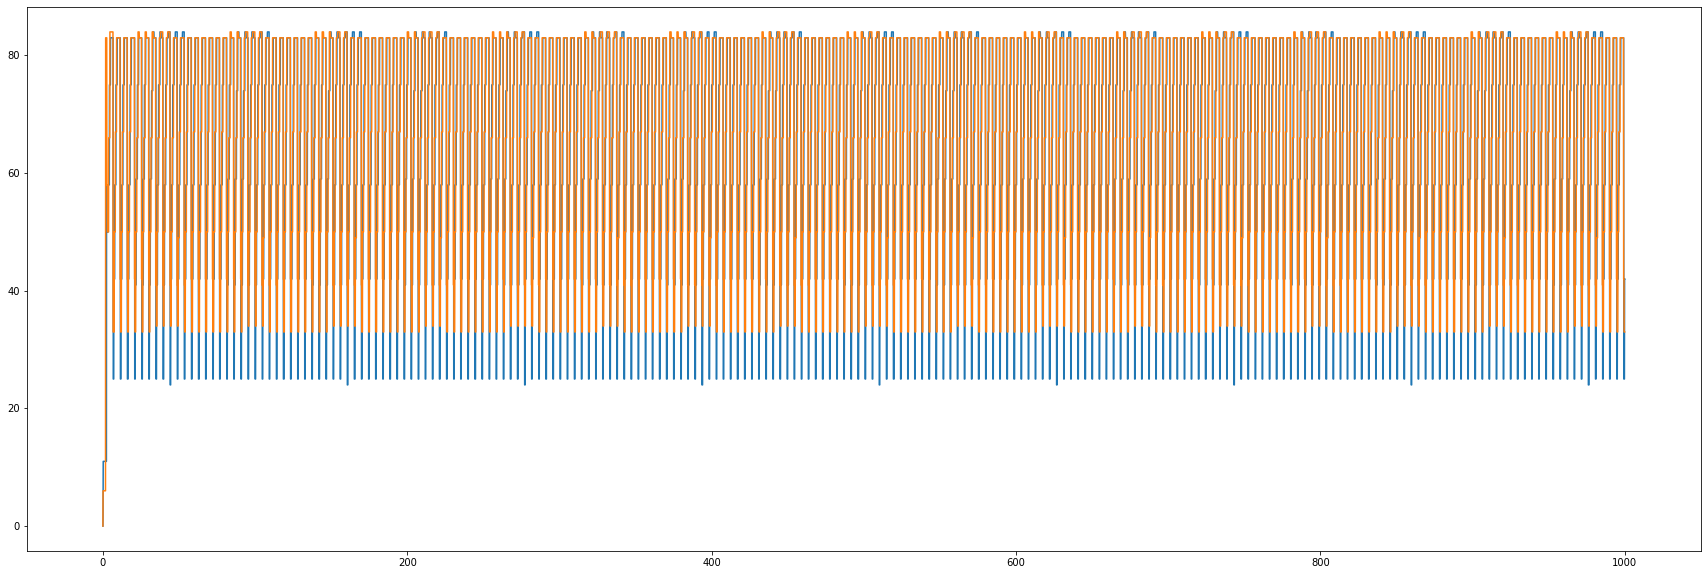

In [95]:
rtt1 = splitted[:, 5]
rtt2 = splitted[:, 6]
plt.figure(figsize=(30,10))
plt.plot(times, rtt1)
plt.plot(times, rtt2)
plt.show()

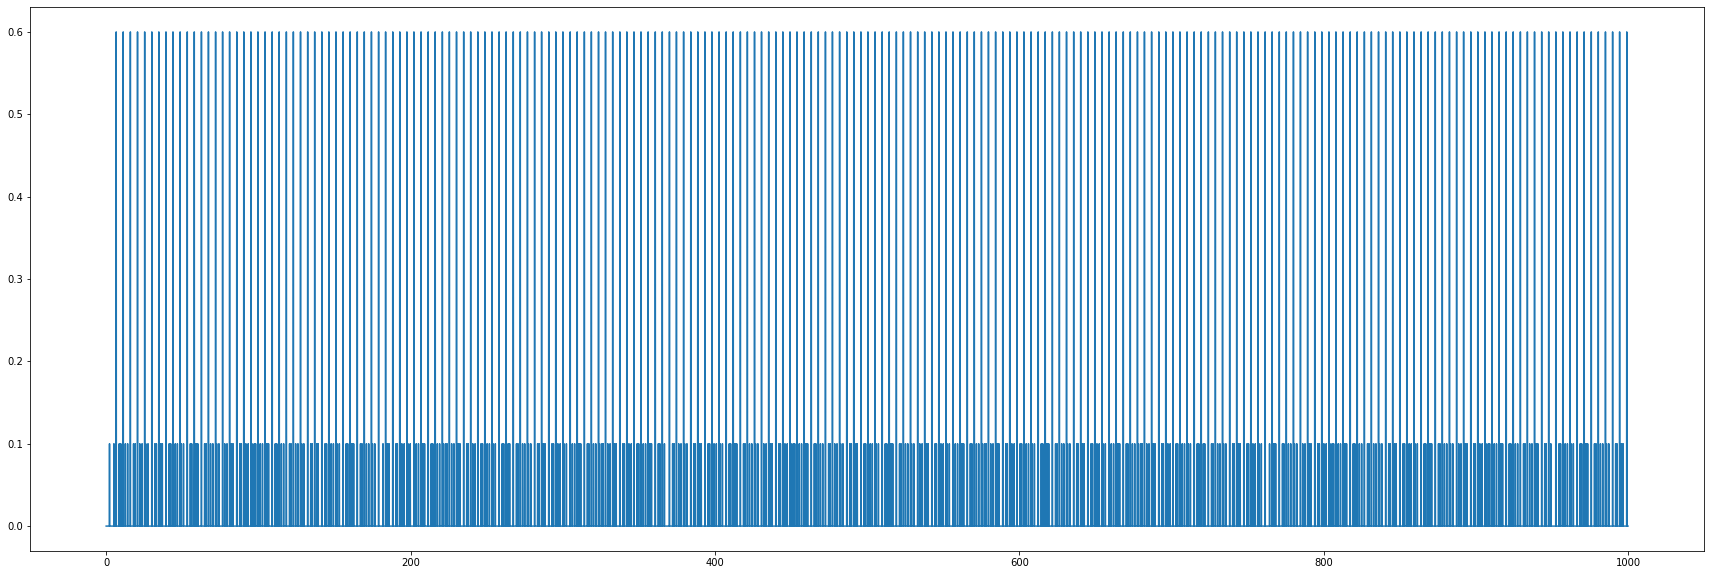

In [97]:
goodput = splitted[:, 1]
plt.figure(figsize=(30,10))
plt.plot(times, goodput)
plt.show()

['d', '0.958952', '2', '3', 'tcp', '1040', '-------', '2', '1.0', '5.0', '10', '36']
